In [1]:
import sys
import os
sys.path.append(os.environ["CODE_REPOSITORY"])
from code_repository.hotones.thetools import *
from code_repository.load.load_simulations import LoadSimulations

In [2]:
external = os.path.join("/media","jofrony","2TB", 
                        "dardel", "current_bgd2","ablation", 
                        "supercomputer", "networks")
repository = os.path.join("/home","jofrony","Documents",
                          "Repositories","current_bgd2",
                          "ablation","supercomputer","networks")

In [3]:
name = "current_injection"
folder = "ratio"

In [4]:
e = Experiments()

                 
e.add_experiment(name="current_injection-all",
                 color="black",
                 label="2 sec simulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_500ms_ablations-all-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")
e.add_experiment(name="current_injection-SPN",
                 color="black",
                 label="2 sec simulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_500ms_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")

e.add_experiment(name="current_injection-FS",
                 color="black",
                 label="2 sec simulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_500ms_ablations-FS-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")  

e.add_experiment(name="current_injection",
                 color="black",
                 label="2 sec stimulation",
                 network="network-synapses.hdf5",
                 path=os.path.join(external, "pdc_network_2022-08-24"),
                 output="network_output_500ms_network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5")
e.experiments     

{'current_injection-all': {'color': 'black',
  'label': '2 sec simulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_500ms_ablations-all-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5'},
 'current_injection-SPN': {'color': 'black',
  'label': '2 sec simulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_500ms_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5'},
 'current_injection-FS': {'color': 'black',
  'label': '2 sec simulation',
  'network': 'network-synapses.hdf5',
  'path': '/media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24',
  'output': 'network_output_500ms_ablations-FS-network-synapses_cell_ids_current_inj

In [8]:
%%time
neuron_type = "dSPN"
sl = LoadSimulations(experiments=e, load_simulation=True)
sl.load_network_file(load_synapses=False)
spiking_analysis_dict = spiking_analysis(data_obj=sl, neuron_type=neuron_type)


Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_500ms_ablations-all-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_500ms_ablations-SPN-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/supercomputer/networks/pdc_network_2022-08-24/simulation/network_output_500ms_ablations-FS-network-synapses_cell_ids_current_injection_dardel_2022-09-19-13-01-25.hdf5
Loading 20000 neurons with 15856878 synapses and 2434 gap junctions
Loading /media/jofrony/2TB/dardel/current_bgd2/ablation/s

In [9]:
p = calculate_ratio(dictionary=spiking_analysis_dict)
n = normalized_prp(dictionary=p, normalized="current_injection")

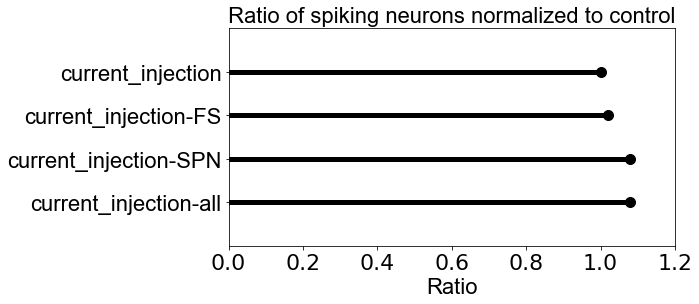

In [10]:
plot_ratio_normalized_spiking(ratio_dict=n, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, max_ratio=1.2)

In [11]:
%%time
neuron_type = "iSPN"
sl = LoadSimulations(experiments=e)
spiking_analysis_dict = spiking_analysis(data_obj=sl, neuron_type=neuron_type)


 Identifying spiking neurons within the network 
Analysing current_injection-all
Analysing current_injection-SPN
Analysing current_injection-FS
Analysing current_injection
CPU times: user 2min 30s, sys: 2.6 s, total: 2min 32s
Wall time: 3min 29s


In [12]:
p = calculate_ratio(dictionary=spiking_analysis_dict)
n = normalized_prp(dictionary=p, normalized="current_injection")

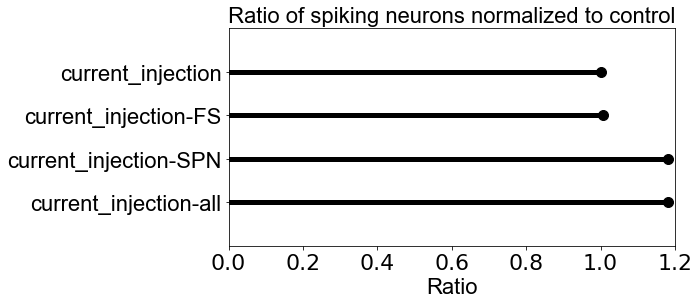

In [13]:
plot_ratio_normalized_spiking(ratio_dict=n, experiment_names=e, fig_name=neuron_type, folder=folder, save=True, max_ratio=1.2)